In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import string
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/israel-palestine/reddit_comments_clean.csv")
df.head()

,post_id,id,label,text,timestamp,ups
0,175au9w,k4efycz,neutral,Israel pulled out of Gaza in 2005 so the 2010 ...,2023-10-11 11:56:11,1411
1,175au9w,k4eg0gi,with palestine,The 1946 map should be completely red as the w...,2023-10-11 11:56:49,833
2,175au9w,k4ees0u,with palestine,To be fair. You should count 1947 as the first...,2023-10-11 11:43:13,457
3,175au9w,k4eke8z,with israel,No. Each map is depicting something different....,2023-10-11 12:41:04,217
4,175au9w,k4eipaq,with israel,"A history of Israel over the last 100 years, i...",2023-10-11 12:24:44,168


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Define stopwords and stemmer
stop_words = set(stopwords.words('english'))
print(stop_words)

{'theirs', 'he', "shan't", 'to', 'has', 'doing', 'does', 'if', 'can', 'just', 'under', 'o', 'only', 'not', 'them', 'where', 'very', 'm', 'wouldn', 'why', 'in', 'further', "you'll", 'such', 'will', 'mightn', 'mustn', 'its', "you're", 'him', 'we', "that'll", 'now', "haven't", 'isn', 'after', 'which', 'needn', 'through', 'once', 'won', 'your', 'here', 'hadn', "couldn't", 'this', 'me', 'over', "won't", 'from', 'when', 'themselves', 'am', 'how', 'a', 'shan', 'all', 'yours', 'ourselves', 'the', 'by', 'these', 'against', 'don', 'most', 'own', 'of', 'ma', 'who', "hasn't", "aren't", 'other', 'his', 'out', 'off', 'because', 'she', 'y', 'any', 'i', 'while', "you've", "don't", 's', 'my', 'each', 'hers', 'into', 'is', 'herself', 'as', 'been', 'those', 'should', "shouldn't", 'are', 'and', 'but', 'ain', 'himself', 'during', "isn't", 'an', 'then', "mightn't", "mustn't", "needn't", 'too', 'no', 'yourselves', 'was', 're', 'same', "wouldn't", 'being', 'did', 'until', 'more', 'for', 'so', "didn't", 'or', 

In [ ]:


# Remove the unwanted columns
df = df[['label', 'text']]

# Display the modified dataframe
print("Modified DataFrame:")
print(df.head())

Modified DataFrame:
            label                                               text
0         neutral  Israel pulled out of Gaza in 2005 so the 2010 ...
1  with palestine  The 1946 map should be completely red as the w...
2  with palestine  To be fair. You should count 1947 as the first...
3     with israel  No. Each map is depicting something different....
4     with israel  A history of Israel over the last 100 years, i...


In [ ]:
stemmer = PorterStemmer()

# Define a function for text preprocessing
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]


    # Lemmatization
    lemmatizer = nltk.WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    return ' '.join(lemmatized_tokens)

In [ ]:
df['cleaned_text'] = df['text'].apply(preprocess_text)
df.head()

,label,text,cleaned_text
0,neutral,Israel pulled out of Gaza in 2005 so the 2010 ...,israel pulled gaza 2005 2010 map straight wron...
1,with palestine,The 1946 map should be completely red as the w...,1946 map completely red whole thing british co...
2,with palestine,To be fair. You should count 1947 as the first...,fair count 1947 first map giving independence ...
3,with israel,No. Each map is depicting something different....,map depicting something different first map sh...
4,with israel,"A history of Israel over the last 100 years, i...",history israel last 100 year youre interested ...


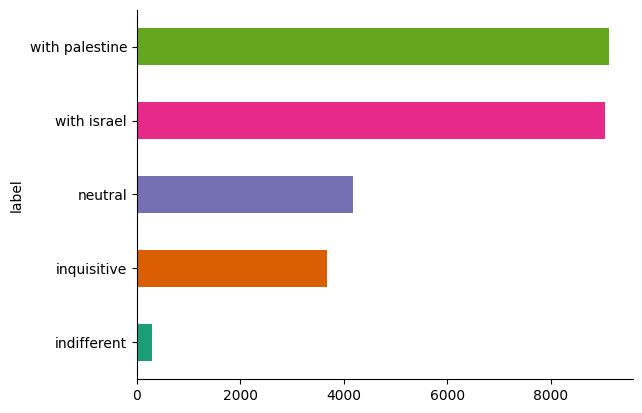

In [ ]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.dropna()
rows_to_drop = df[df['cleaned_text']==''].index
df = df.drop(rows_to_drop)
print(df.isnull().sum())


label           0
text            0
cleaned_text    0
dtype: int64


In [ ]:

#tokenizer = Tokenizer()
#tokenizer.fit_on_texts(df['cleaned_text'])
#X = tokenizer.texts_to_sequences(df['cleaned_text'])



In [ ]:
#sequence_lengths = [len(sequence) for sequence in X]
#max_length = int(np.percentile(sequence_lengths, 95))
#print("95th percentile of sequence length:", max_length)


NameError: name 'X' is not defined

In [ ]:
#max_length = 60 # Example value, adjust based on your maximum sequence length
#X = pad_sequences(X, maxlen=max_length, padding='post')


mapping = {"with israel": 0, "with palestine": 1, 'neutral': 2, 'inquisitive':3,'indifferent':4}
df['classes'] = df['label'].map(mapping)

y = df['classes']

In [ ]:
print(df["label"].unique())

In [ ]:
# Split the data into training and testing sets
#X_train, X_test, #y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'].tolist(), df['classes'].tolist(), test_size=0.15, random_state=42)

In [ ]:
print(X_train)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bucketresearch/politicalBiasBERT")
bert_model = TFBertModel.from_pretrained("bucketresearch/politicalBiasBERT")

# Tokenize the data
def tokenize_data(data):
    return tokenizer(data, padding=True, truncation=True, return_tensors="tf", max_length=60)

train_encodings = tokenize_data(X_train)
val_encodings = tokenize_data(X_test)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['bert.embeddings.position_ids', 'classifier.bias', 'classifier.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to th

In [ ]:
# Convert encodings to sequences
X_train = pad_sequences(train_encodings['input_ids'], maxlen=60, padding='post')
X_test = pad_sequences(val_encodings['input_ids'], maxlen=60, padding='post')

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)
print(y_train)

[3 1 1 ... 1 2 1]


In [ ]:
# Define the model
embedding_dim = 1000
lstm_units = 128

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.vocab) + 1, output_dim=embedding_dim, input_length=60)) # The embedding layer
model.add(LSTM(128, return_sequences=True)) # Our LSTM layer
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(y_train)

[3 1 1 ... 1 2 1]


In [ ]:
checkpoint = ModelCheckpoint("/content/drive/MyDrive/israel-palestine/best_model1.hdf5", monitor='val_accuracy',
                             verbose=1,save_best_only=True, mode='auto', save_freq='epoch',save_weights_only=False)

In [ ]:
# Train the model

history = model.fit(X_train, y_train, epochs=7, batch_size=64, validation_data=(X_test, y_test), callbacks=[checkpoint])
#history = model.fit(X_train, y_train, epochs=5,batch_size=64,validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/7
350/350 [==============================] - ETA: 0s - loss: 1.3528 - accuracy: 0.3481
Epoch 1: val_accuracy improved from -inf to 0.34136, saving model to /content/drive/MyDrive/israel-palestine/best_model1.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


350/350 [==============================] - 145s 396ms/step - loss: 1.3528 - accuracy: 0.3481 - val_loss: 1.3488 - val_accuracy: 0.3414
Epoch 2/7
350/350 [==============================] - ETA: 0s - loss: 1.3138 - accuracy: 0.3660
Epoch 2: val_accuracy improved from 0.34136 to 0.39133, saving model to /content/drive/MyDrive/israel-palestine/best_model1.hdf5
350/350 [==============================] - 108s 307ms/step - loss: 1.3138 - accuracy: 0.3660 - val_loss: 1.2869 - val_accuracy: 0.3913
Epoch 3/7
350/350 [==============================] - ETA: 0s - loss: 1.2324 - accuracy: 0.4386
Epoch 3: val_accuracy improved from 0.39133 to 0.43114, saving model to /content/drive/MyDrive/israel-palestine/best_model1.hdf5
350/350 [==============================] - 110s 313ms/step - loss: 1.2324 - accuracy: 0.4386 - val_loss: 1.2589 - val_accuracy: 0.4311
Epoch 4/7
350/350 [==============================] - ETA: 0s - loss: 1.1170 - accuracy: 0.5314
Epoch 4: val_accuracy improved from 0.43114 to 0.464

In [ ]:
import matplotlib.pyplot as plt

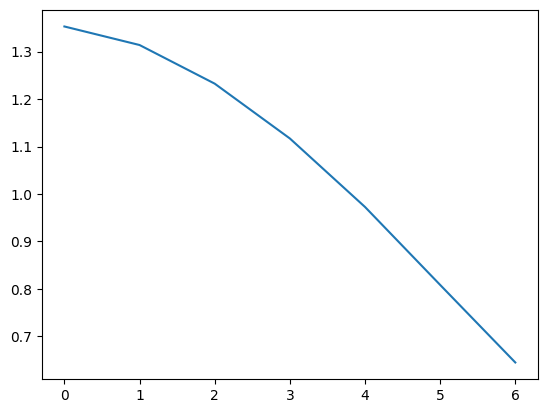

In [ ]:
plt.plot(history.history["loss"])


In [ ]:
# Make predictions on new data
text = pd.Series(["I love palestine"])
text = text.apply(preprocess_text)
inputs = tokenizer(text.tolist(), padding=True, truncation=True, max_length=60, return_tensors="tf")
inputs = pad_sequences(inputs['input_ids'], maxlen=60, padding='post')
predictions = model.predict(inputs)
print(predictions)

1/1 [==============================] - 0s 413ms/step
[[0.04632448 0.91198134 0.02759698 0.01159659 0.00250059]]


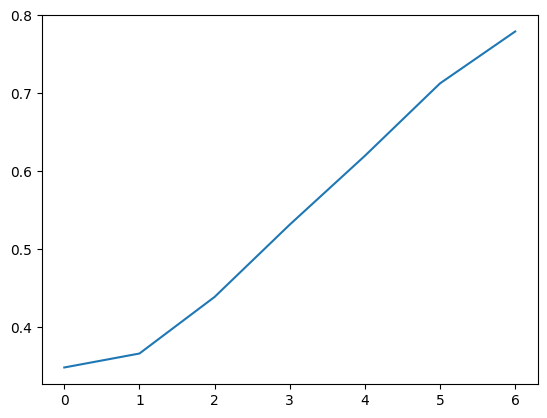

In [ ]:
plt.plot(history.history["accuracy"])

In [ ]:

from tensorflow.keras.models import load_model
from transformers import AutoTokenizer


# Load the pre-trained model
model = load_model("/content/drive/MyDrive/israel-palestine/best_model1.hdf5")

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("bucketresearch/politicalBiasBERT")

# Load the news data
news_df = pd.read_csv("/content/drive/MyDrive/israel-palestine/news_data.csv")

# Define stopwords
stop_words = set(nltk.corpus.stopwords.words('english'))

# Define preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

# Preprocess the news data
news_df['processed_headline'] = news_df['headline'].apply(preprocess_text)
news_df['processed_description'] = news_df['description'].apply(preprocess_text)

# Tokenize and pad the preprocessed text
def tokenize_data(data):
    return tokenizer(data, padding=True, truncation=True, max_length=60)

headline_encodings = tokenize_data(news_df['processed_headline'].tolist())
description_encodings = tokenize_data(news_df['processed_description'].tolist())

headline_sequences = pad_sequences(headline_encodings['input_ids'], maxlen=60, padding='post')
description_sequences = pad_sequences(description_encodings['input_ids'], maxlen=60, padding='post')

# Predict labels for each news item
headline_predictions = model.predict(headline_sequences)
description_predictions = model.predict(description_sequences)

# Convert predictions to labels
def get_label(prediction):
    return np.argmax(prediction)

news_df['headline_label'] = [get_label(prediction) for prediction in headline_predictions]
news_df['description_label'] = [get_label(prediction) for prediction in description_predictions]

# Count occurrences of each label for headlines
headline_label_counts = news_df['headline_label'].value_counts().to_dict()

# Count occurrences of each label for descriptions
description_label_counts = news_df['description_label'].value_counts().to_dict()

# Define label mapping
label_mapping = {
    0: 'neutral',
    1: 'pro-Palestine',
    2: 'pro-Israel',
    3: 'inquisitive',
    4: 'indifferent'
}

# Display results for headlines
print("Headline :")
for label, count in headline_label_counts.items():
    print(f"{label_mapping[label]}: {count}")

# Display results for descriptions
print("\nDescription:")
for label, count in description_label_counts.items():
    print(f"{label_mapping[label]}: {count}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


105/105 [==============================] - 1s 6ms/step
Headline :
pro-Palestine: 1654
neutral: 1452
inquisitive: 154
pro-Israel: 78

Description:
pro-Palestine: 1610
neutral: 1394
inquisitive: 175
pro-Israel: 159
